In [1]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_AN_RF_AN_fold7_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0.047111,-0.084468,0.183206,0.106957,-0.197840,-0.146146,-0.014713,-0.039870,-0.177392,-0.150429,...,-0.054681,0.054666,-0.170043,-0.088327,-0.044075,-0.138131,Abnormal,P31,FP-B,AB01
1,-0.008152,-0.108617,0.332554,0.065598,-0.212385,-0.154046,0.185813,-0.174432,-0.162742,-0.105734,...,0.080151,0.071277,-0.140525,-0.019436,0.056166,-0.147874,Abnormal,P1,FP-A,AB01
2,0.029979,-0.104213,0.186764,0.072720,-0.206438,-0.132990,0.390629,-0.209839,-0.182634,-0.188508,...,0.067272,0.007184,-0.215518,-0.103547,-0.064773,-0.091860,Abnormal,P2,FP-A,AB01
3,0.197579,-0.117897,0.258689,0.024050,-0.209905,-0.083890,0.158171,-0.129445,-0.176343,-0.175681,...,0.002003,0.127952,-0.183598,-0.122935,0.011867,-0.153681,Abnormal,P42,FP-B,AB01
4,-0.001912,-0.121546,0.375175,0.073468,-0.217575,-0.134245,0.273981,-0.185224,-0.157108,-0.152178,...,-0.054425,0.013421,-0.169608,-0.113710,-0.100158,-0.153804,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.491096,1.002230,-0.172730,-0.136594,0.595726,0.547629,-0.132018,0.425446,0.839854,0.207744,...,0.385910,-0.171571,-0.167495,0.940307,-0.085193,0.750029,Normal,P32,FP-B,Normal
4596,-0.011974,0.148026,-0.153517,0.288432,0.228395,0.791473,-0.186303,0.526963,0.464647,0.790330,...,0.025029,-0.189784,-0.117060,0.447950,-0.152273,0.707199,Normal,P42,FP-B,Normal
4597,0.272649,0.555701,-0.185605,0.503418,0.345621,1.116217,-0.118170,0.336528,0.322378,0.282140,...,0.289419,-0.125635,-0.149157,0.913193,0.212130,0.825909,Normal,P52,FP-C,Normal
4598,-0.163618,0.502226,-0.136079,-0.055631,0.857396,0.303407,-0.183531,0.703226,0.402094,0.883147,...,-0.117837,-0.189822,-0.126096,1.014838,-0.189943,0.917289,Normal,P61,FP-C,Normal


In [2]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2051]
print(X.shape)
print(y.shape)

(4600, 2048)
(4600,)


In [3]:
y[0]

'AB01'

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [5]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [6]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.821304,0.013913,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.821957,0.014500,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.822391,0.014323,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.820870,0.014295,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.817174,0.014500,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.847391,0.015880,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.846304,0.016414,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.847391,0.017112,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.846304,0.015404,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.824783,0.016069,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [7]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.8213043478260869

 **print the array of mean scores only 

[0.82130435 0.82195652 0.8223913  0.82086957 0.81717391 0.8473913
 0.84630435 0.8473913  0.84630435 0.82478261 0.86043478 0.85717391
 0.85565217 0.85434783 0.82456522 0.86065217 0.85869565 0.85934783
 0.855      0.82456522 0.86       0.85869565 0.85934783 0.855
 0.82456522]

 **examine the best model 

0.8606521739130434
{'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=25, n_estimators=400, random_state=1)


In [8]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 0.8606521739130434


# setting parameters

In [10]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 25, n_estimators = 400, min_samples_split = 2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [11]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_AN_fold7_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [12]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,0.025601,-0.099690,-0.072089,-0.052006,0.063536,-0.153030,-0.087412,0.081581,-0.071721,...,-0.153405,-0.192458,-0.040635,0.131490,-0.053713,-0.102947,Abnormal,P52,FP-C,AB01
1,1,-0.037008,-0.118407,-0.034419,0.173833,-0.203284,-0.146452,0.140077,-0.178230,-0.203584,...,0.066462,-0.065711,-0.194194,-0.104079,0.008717,-0.130910,Abnormal,P2,FP-A,AB02
2,2,0.097381,-0.116292,0.088937,0.164948,-0.209908,-0.152135,0.089500,-0.143866,-0.176397,...,0.098394,-0.047233,-0.151940,-0.094315,0.100857,-0.146942,Abnormal,P51,FP-C,AB02
3,3,-0.053959,-0.129774,0.003296,0.124190,-0.239588,-0.157525,0.290814,-0.226371,-0.195872,...,0.092636,-0.063308,-0.199779,-0.140209,-0.032403,-0.136366,Abnormal,P1,FP-A,AB02
4,4,0.154705,-0.118970,0.088303,-0.004174,-0.226507,-0.093808,0.285779,-0.129870,-0.191472,...,0.103408,-0.108480,-0.199459,-0.092198,0.053188,-0.104273,Abnormal,P31,FP-B,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,652,0.018763,0.786618,-0.152552,0.004148,0.465319,0.373276,-0.115884,0.507926,0.583212,...,0.411906,-0.199250,0.199790,0.679878,0.162925,0.720766,Normal,P32,FP-B,Normal
653,653,-0.096758,-0.040245,-0.138957,0.093709,-0.099716,0.494841,-0.109968,0.454003,0.245495,...,-0.153133,-0.198496,-0.135247,0.014381,-0.020195,-0.110517,Normal,P42,FP-B,Normal
654,654,-0.166961,0.176023,-0.073159,0.128644,0.309635,0.137614,-0.174740,0.220340,-0.051022,...,-0.181926,-0.181339,-0.137622,0.216632,-0.052659,0.098881,Normal,P52,FP-C,Normal
655,655,-0.158293,0.436913,-0.150291,-0.185983,0.383684,0.029321,-0.161464,-0.015472,0.322975,...,-0.205786,-0.223981,-0.120281,0.355565,-0.162169,0.141037,Normal,P61,FP-C,Normal


In [13]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2052]
print(X_test.shape)
print(y_test.shape)

(657, 2048)
(657,)


In [14]:
y_test

0        AB01
1        AB02
2        AB02
3        AB02
4        AB02
        ...  
652    Normal
653    Normal
654    Normal
655    Normal
656    Normal
Name: Sub_class, Length: 657, dtype: object

In [15]:
y_pred = modelOpt.predict(X_test)

In [16]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 25   3   0   0   0   0   0   0   0   0   0   0   0   0   5]
 [ 11  17   0   0   0   0   0   0   0   0   0   0   0   0   4]
 [  0   7   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   9   0   0   0   2   1   0   0   0   0   4  13]
 [  0   0   0   1   8   0   0   0   1   0   0   0   0   1   1]
 [  1   0   0   1   0   1   2   0   1   0   0   0   0   0   1]
 [  1   0   0   1   0   0   2   3   0   0   0   0   0   0   3]
 [  1   0   0   3   1   0   0   2   1   0   0   0   0   3   4]
 [  0   0   0   0   1   0   0   0   6   0   0   0   0   3   5]
 [  1   0   0   2   0   0   0   1   0   0   0   0   0   1   0]
 [  3   0   0   0   0   0   0   0   1   0   3   0   0   1   3]
 [  1   0   0   0   0   0   0   0   0   0   0   0   1   0   3]
 [  0   0   0   0   0   0   0   0   2   0   0   0   2   5   4]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0  25   5]
 [  2   0   0   0   0   0   0   1   1   0   1   0   0   1 423]]
              precision    recall  f1-score   support


/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 21.5, 'Predicted label')

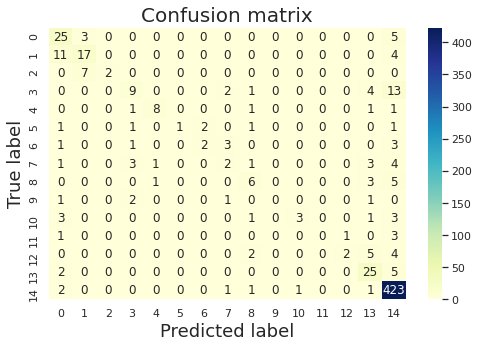

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [18]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_7/models/')
filename = "modelrf_AN_15AB_fold7_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)